In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
from matplotlib import rcParams

In [23]:
acs_income = pd.read_csv('ACS_income.csv')
acs_housing = pd.read_csv('ACS_DP04_housing.csv')
rental_prices = pd.read_csv('/data/clean/nyc_rental_prices.csv')
zhome_value = pd.read_csv('/data/clean/zhome_value.csv')
airbnb = pd.read_csv('abnb_clean.gz')

FileNotFoundError: [Errno 2] No such file or directory: '/data/clean/nyc_rental_prices.csv'

In [3]:
acs_income = acs_income.drop_duplicates()
acs_income['year'] = acs_income['year'].astype('str')
acs_income_boro = acs_income.groupby(['borough','year'])[['latino_mean_income','african_american_mean_income','white_mean_income']].mean().reset_index()


In [4]:
acs_housing = acs_housing.drop_duplicates()
acs_housing['year'] = acs_housing['year'].astype('str')
acs_housing_boro = acs_housing.groupby(['borough','year']).agg({'total_housing_units' : 'sum',
                                                                'rent_occ_median_rent' : 'mean',
                                                                'own_occ_median_value' : 'mean',
                                                                'owner_occupied_units' : 'sum',
                                                                'renter_occupied_units' : 'sum',}).reset_index()

In [5]:
airbnb = airbnb.drop(columns='Unnamed: 0')
airbnb['year'] = pd.to_datetime(airbnb['last_scraped']).dt.to_period('Y').astype('str')
airbnb['borough'] = airbnb['borough'].replace('Staten Island','Staten_Island')
airbnb_boro = airbnb.groupby(['borough','year'])['id'].count().to_frame().reset_index()
airbnb_boro = airbnb_boro.rename(columns = {'id':'airbnb_listings'})

In [6]:
boro_merge = acs_housing_boro.merge(airbnb_boro, on=['borough','year'], how='outer')
boro_merge = boro_merge.merge(acs_income_boro, on=['borough','year'], how ='outer')

In [7]:
boro_merge['airbnb_listings'].sum()

335503.0

In [8]:
boro_merge['renter_occupied_units'].sum()

23402575.0

In [9]:
data1 = boro_merge.melt(id_vars=['borough', 'year'], 
              value_vars=['own_occ_median_value',
                          'rent_occ_median_rent',
                          'latino_mean_income',
                         'african_american_mean_income',
                         'white_mean_income'],
              var_name='Measurement', value_name='Dollars')
data2 = boro_merge.melt(id_vars=['borough', 'year'], 
              value_vars=['airbnb_listings',
                          'total_housing_units',
                          'owner_occupied_units',
                         'renter_occupied_units'], 
              var_name='Measurement', value_name='Count')

#data1 = data1.set_index(['borough', 'year', data1.groupby(['borough', 'year']).cumcount()])
#data2 = data2.set_index(['borough', 'year', data2.groupby(['borough', 'year']).cumcount()])




In [10]:
data1['year'] = pd.to_datetime(data1['year'], format='%Y').dt.to_period('Y')
data2['year'] = pd.to_datetime(data2['year'], format='%Y').dt.to_period('Y')


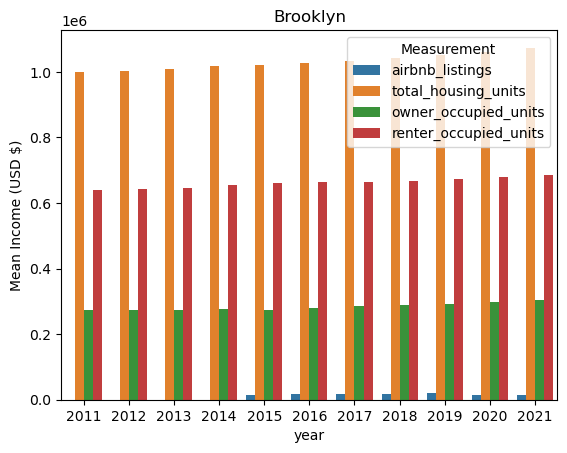

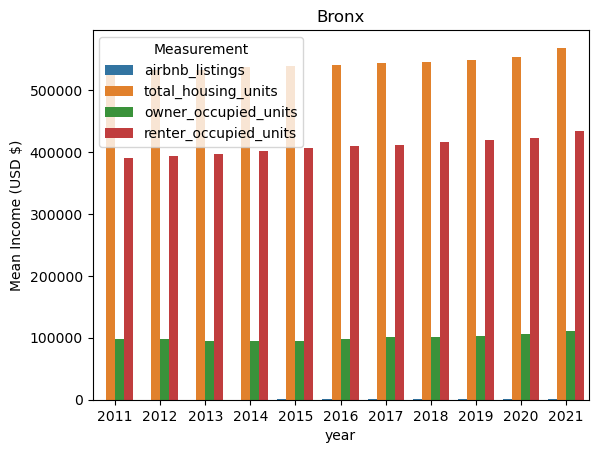

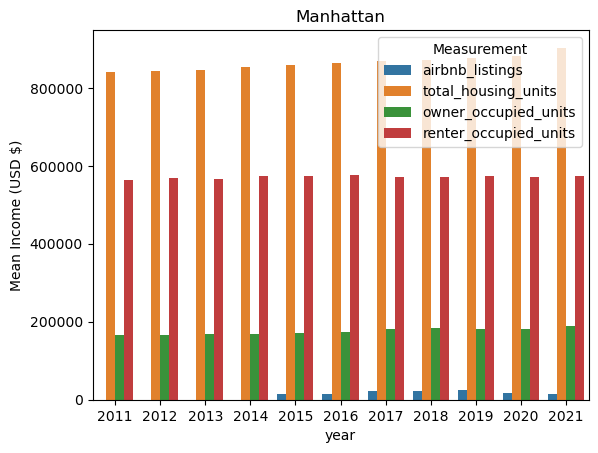

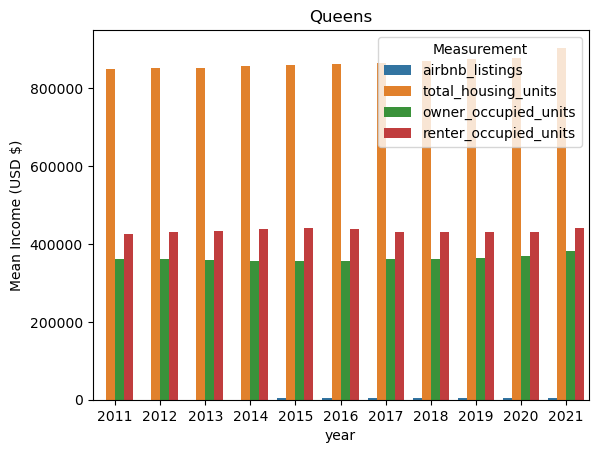

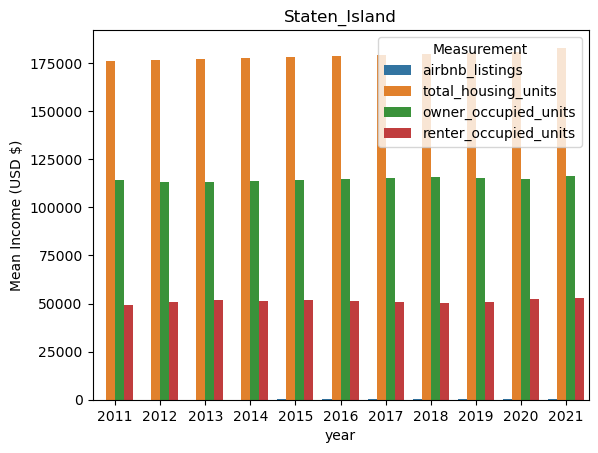

In [11]:
ax = sns.barplot(data=data2[(data2['borough']=='Brooklyn') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Brooklyn')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='Bronx') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Bronx')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='Manhattan') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Manhattan')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='Queens') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Queens')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='Staten_Island') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Staten_Island')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

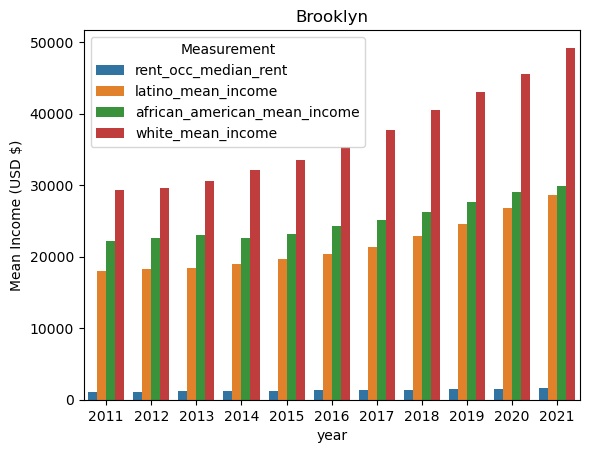

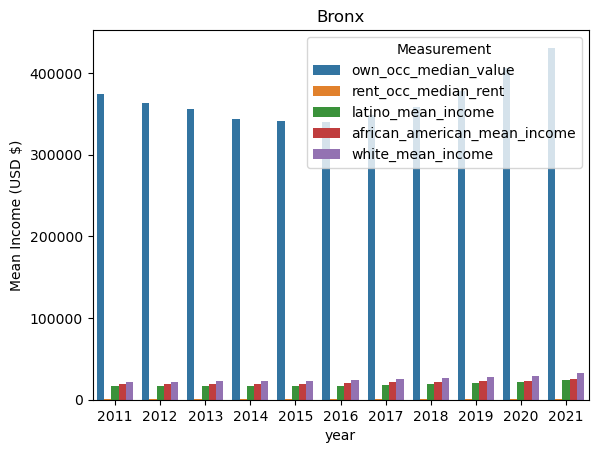

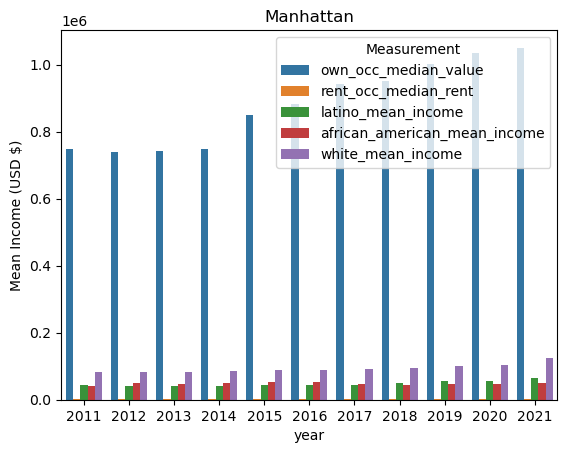

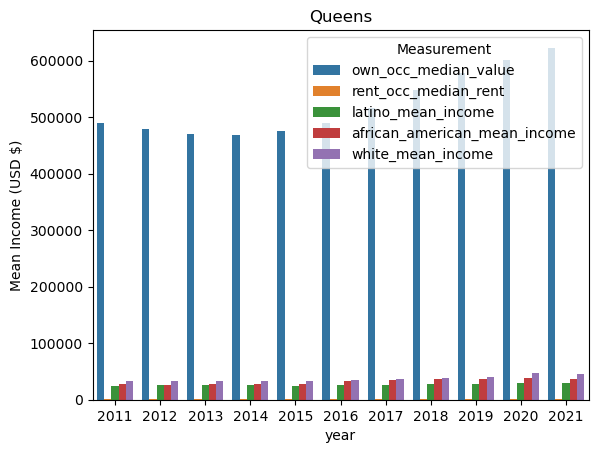

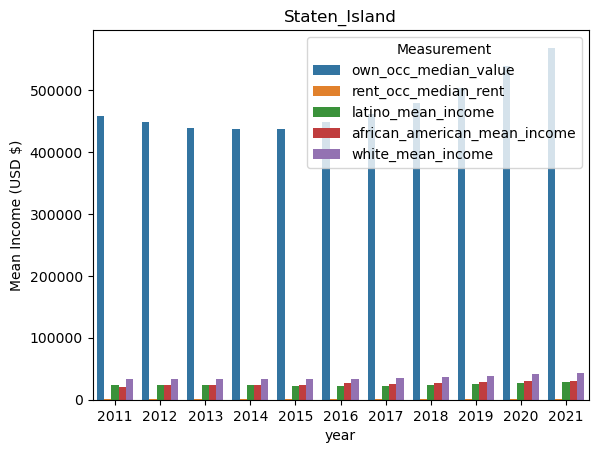

In [12]:
ax = sns.barplot(data=data1[(data1['borough']=='Brooklyn') & (data1['year']<'2022') & (data1['Measurement']!= 'own_occ_median_value')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Brooklyn')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='Bronx') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Bronx')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='Manhattan') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Manhattan')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='Queens') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Queens')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='Staten_Island') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Staten_Island')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

In [13]:
boro_pre22 = boro_merge[boro_merge['year']!='2022']

In [14]:
acs_income.columns

Index(['year', 'borough', 'zipcode', 'households_s1901_total_population',
       'households_s1902_total_population', 'households_median_income',
       'households_s1901_mean_income', 'households_s1902_mean_income',
       'families_total_population', 'families_median_income',
       'families_mean_income', 'married_couple_families_total_population',
       'married_couple_families_median_income',
       'married_couple_families_mean_income',
       'nonfamily_households_total_population',
       'nonfamily_households_median_income',
       'nonfamily_households_mean_income', 'resident_total_population',
       'resident_mean_income', 'white_total_population', 'white_mean_income',
       'african_american_total_population', 'african_american_mean_income',
       'amer_indian/alaska_native_total_population',
       'amer_indian/alaska_native_mean_income', 'asian_total_population',
       'asian_mean_income', 'hawaiian/_pacific_islander_total_population',
       'hawaiian/_pacific_islan

In [15]:
ab_change = airbnb[['zipcode','borough','year','id']]
ab_change = ab_change[ab_change['year'] != '2022']
income_change = acs_income[['zipcode','borough','year','latino_mean_income','white_mean_income','african_american_mean_income','amer_indian/alaska_native_mean_income']]

In [16]:
ab_change = ab_change.groupby(['zipcode','borough','year'])['id'].count().to_frame().reset_index()

In [17]:
change_merge= income_change.merge(ab_change, on=['zipcode','borough','year'], how='outer')

In [18]:
change_merge = change_merge.sort_values(by=['year','zipcode'])

In [19]:
zips = change_merge['zipcode'].unique()

In [20]:
change_merge['latino_mi_income_%change'] = change_merge['latino_mean_income'].pct_change(fill_method ='ffill')

In [21]:
change_merge.loc[(change_merge['year'] =='2011'), 'latino_mi_income_%change'] = np.nan

In [22]:
change_merge.head(20)

,zipcode,borough,year,latino_mean_income,white_mean_income,african_american_mean_income,amer_indian/alaska_native_mean_income,id,latino_mi_income_%change
65,10001,Manhattan,2011,27990.0,77348.0,20907.0,13651.0,NaN,NaN
66,10002,Manhattan,2011,14719.0,43548.0,20028.0,14304.0,NaN,NaN
67,10003,Manhattan,2011,39748.0,81778.0,37601.0,9242.0,NaN,NaN
68,10004,Manhattan,2011,75236.0,166901.0,35772.0,NaN,NaN,NaN
69,10005,Manhattan,2011,77397.0,94585.0,63392.0,NaN,NaN,NaN
70,10006,Manhattan,2011,36520.0,107685.0,23452.0,NaN,NaN,NaN
71,10007,Manhattan,2011,42724.0,155404.0,29967.0,NaN,NaN,NaN
72,10009,Manhattan,2011,19462.0,57069.0,22550.0,14261.0,NaN,NaN
73,10010,Manhattan,2011,42643.0,95439.0,41405.0,NaN,NaN,NaN
74,10011,Manhattan,2011,55709.0,118956.0,29512.0,21123.0,NaN,NaN
